In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)

In [2]:
  df = pd.read_csv('50_Startups.csv',sep=",")

In [3]:
df.head(50)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
df.loc[df['R&D Spend']==0,'R&D Spend']=df['R&D Spend'].median()
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.00000,50.000000,50.000000,50.000000
mean,76643.65880,121344.639600,211025.097800,112012.639200
std,43318.48584,28017.802755,122290.310726,40306.180338
min,542.05000,51283.140000,0.000000,14681.400000
25%,46117.03250,103730.875000,129300.132500,90138.902500
50%,73522.82000,122699.795000,212716.240000,107978.190000
75%,101602.80000,144842.180000,299469.085000,139765.977500
max,165349.20000,182645.560000,471784.100000,192261.830000


In [7]:
df.loc[df['Marketing Spend']==0,'Marketing Spend']=df['Marketing Spend'].median()
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.00000,50.000000,50.000000,50.000000
mean,76643.65880,121344.639600,223788.072200,112012.639200
std,43318.48584,28017.802755,109829.200717,40306.180338
min,542.05000,51283.140000,1903.930000,14681.400000
25%,46117.03250,103730.875000,142431.385000,90138.902500
50%,73522.82000,122699.795000,213675.525000,107978.190000
75%,101602.80000,144842.180000,299469.085000,139765.977500
max,165349.20000,182645.560000,471784.100000,192261.830000


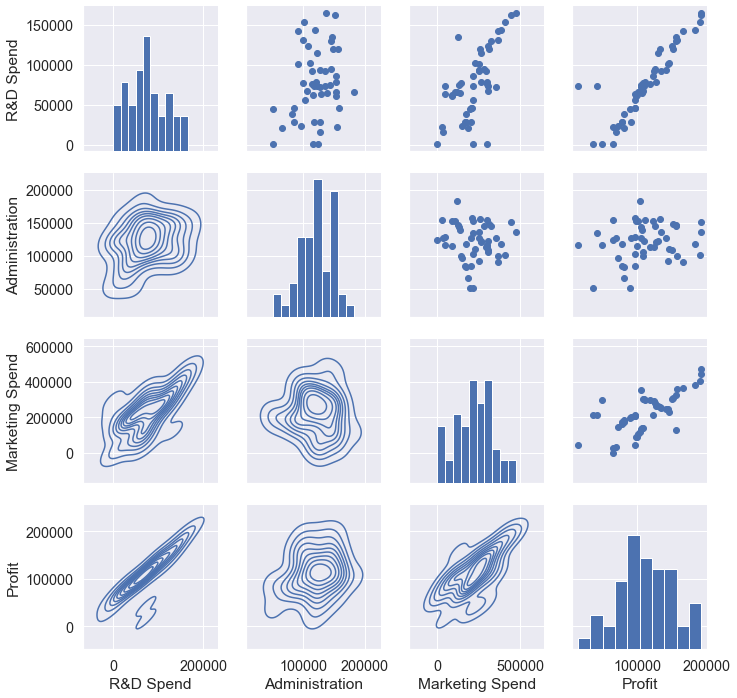

In [8]:
g = sns.PairGrid(df)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

In [9]:
x = df[['R&D Spend', 'Administration', 'Marketing Spend']]
y = df['Profit']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [11]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [12]:
y_pred = model.predict(x_test)
y_pred

array([122377.57231279,  81499.0307291 ,  87840.0918995 ,  38842.2748868 ,
       126671.74119703,  61094.16251591,  99777.37449581,  93277.21846688,
        84015.88326883, 114288.61914589, 123613.01314934, 167712.14018502,
        88291.41455638, 146380.80658141, 169922.92939484])

In [13]:
y_test

13    134307.35
39     81005.76
30     99937.59
45     64926.08
17    125370.37
48     35673.41
26    105733.54
25    107404.34
32     97427.84
19    122776.86
12    141585.52
4     166187.94
37     89949.14
8     152211.77
3     182901.99
Name: Profit, dtype: float64

In [14]:
model.score(x_train, y_train)

0.7743242434204214

In [15]:
model.score(x_test, y_test)

0.875162079391752

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
np.sqrt(mean_squared_error(y_test, y_pred))

13253.191223326692

In [34]:
model.predict([[34, 12, 39]])

array([42163.32737675])

In [35]:
model.coef_

array([ 0.6589032 , -0.033316  ,  0.09554174])

In [36]:
model.intercept_

42137.59833203886

In [37]:
pd.DataFrame(model.coef_, x.columns, columns=["Startups"])

,Startups
R&D Spend,0.658903
Administration,-0.033316
Marketing Spend,0.095542
